In [5]:
# Author: M. Riley Owens (GitHub: mrileyowens)

# This file creates a figure showing the Lya
# NB maps centered on a small cutout around the
# portion of the arc that MagE aperture slit M3 targets

In [6]:
import os

import numpy as np

import astropy.units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import matplotlib.patches as patches
import matplotlib.patheffects as pe

In [7]:
def plot():

    '''
    Make a figure showing the Lya maps of the slit M3 MagE aperture at various statistical significances
    '''

    # Establish common directories
    home = os.getcwd()
    figs = f'{home}/figs'
    results = f'{home}/results'

    # Get the file paths to the Lya maps from either local continuum estimate schemes
    lya_f390w = f'{results}/lya_maps/lya_cont_sub_F390W.fits'
    lya_f555w = f'{results}/lya_maps/lya_cont_sub_F555W.fits'

    # Set the center and width of a square area in celestial coordinates
    center = SkyCoord(frame='fk5', ra='15h50m00.6009s', dec='-78d11m09.912s')
    size = 3.21 * u.arcsecond

    # Instantiate the figure and axes
    fig, ax = plt.subplots(2,7, figsize=(14,4))

    # Adjust the space between the subplots
    plt.subplots_adjust(hspace=0, wspace=0)

    # Labels for the type of Lya map
    filter_labels = np.array(['Lyα (F390W)', 'Lyα (F555W)'], dtype=str)

    # Numbers of standard deviations to plot for each Lya map
    sigmas = np.array([-5, -3, -1, 0, +1, +3, +5], dtype=int)

    # Labels for numbers of standard deviations
    sigma_labels = np.array(['$\mathbf{{-5\sigma}}$', '$\mathbf{{-3\sigma}}$',
        '$\mathbf{{-1\sigma}}$', '', '$\mathbf{{+1\sigma}}$', '$\mathbf{{+3\sigma}}$', '$\mathbf{{+5\sigma}}$'], dtype=str)

    # For each Lya map file
    for i, file in enumerate([lya_f390w, lya_f555w]):

        # Get the HDU list of the file
        hdul = fits.open(file)

        # Make square cutouts of the data counts and associated uncertainties
        cutout_f = Cutout2D(hdul[0].data, center, size, wcs=WCS(hdul[0].header))
        cutout_n = Cutout2D(hdul[1].data, center, size, wcs=WCS(hdul[1].header))

        # Compute the median value of the data
        median = np.median(cutout_f.data)

        # For each number of standard deviations
        for j, sigma in enumerate(sigmas):

            # Plot the data at the given number of standard deviations
            ax[i,j].imshow(cutout_f.data + (sigma * cutout_n.data), origin='lower', cmap='gray', 
                vmin=-10 * median, vmax=50 * median, interpolation='none')

            # Plot an ellipse on the axes marking the main image of slit M3
            weird_clump = patches.Ellipse((47, 52), 15, 15, 45, facecolor='none',
                edgecolor='#005AB5', linestyle='solid', linewidth=1)
            ax[i,j].add_patch(weird_clump)

            # Plot a rectangle indicating the size and orientation of the slit M3 MagE aperture
            aperture = patches.Rectangle((39.333,-113.167), 28.33333, 333.33, angle=298,
                rotation_point='center', facecolor='none', edgecolor='#D41159', linestyle='dashed', linewidth=3)
            ax[i,j].add_patch(aperture)

            # Get the cutout dimensions in pixels
            width, height = np.shape(cutout_f.data)

            # Set the pixel limits of the coordinate axes of the subplot. The '1 / 0.03' term represents the half 
            # width of the subplot in pixels, since the width of the subplot is 2 arcseconds and each pixel is 0.03 
            # arcseconds across
            ax[i,j].set_xlim(width / 2 - 1 / 0.03, width / 2 + 1 / 0.03)
            ax[i,j].set_ylim(height / 2 - 1 / 0.03, height / 2 + 1 / 0.03)

            # Add inward facing ticks to all sides of the subplot, but do not label the top or right sides
            ax[i,j].tick_params(top=True, right=True, labelright=False, labeltop=False, direction='in')

            # Add tick labels to the bottom if the subplot is in the bottom row, but disable bottom tick labels otherwise
            ax[i,j].tick_params(labelbottom=True) if i > 0 else ax[i,j].tick_params(labelbottom=False)

            # Add tick labels to the left if the subplot is in the leftmost column, but disable left tick labels otherwise
            ax[i,j].tick_params(labelleft=True) if j == 0 else ax[i,j].tick_params(labelleft=False)

            # Set the ticks and tick labels of the coordinate axes
            ax[i,j].set_xticks([width / 2 - 0.5 / 0.03,
                                width / 2,
                                width / 2 + 0.5 / 0.03],
                            ['+0.5', '0', '−0.5'])
            ax[i,j].set_yticks([height / 2 - 0.5 / 0.03,
                                height / 2,
                                height / 2 + 0.5 / 0.03],
                            ['−0.5', '0', '+0.5'])

            # Set the aspect ratio of the axes
            ax[i,j].set_aspect('auto', adjustable='datalim')

            # Add the label indicating the number of standard deviations of the axes
            at = AnchoredText(sigma_labels[j], loc='upper right', frameon=False, prop=dict(color='white', fontsize='small', fontweight='bold', path_effects=[pe.withStroke(linewidth=2, foreground='black')]))
            ax[i,j].add_artist(at)

            # Add the label indicating the type of Lya map of the axes
            at = AnchoredText(filter_labels[i], loc='upper left', frameon=False, prop=dict(color='white', fontsize='small', fontweight='bold', path_effects=[pe.withStroke(linewidth=2, foreground='black')]))
            ax[i,j].add_artist(at)

    # Add labels to the coordinate axes
    ax[1,3].set_xlabel(r'$\Delta$ Right ascension (")', fontsize='large')
    fig.supylabel(r'$\Delta$ Declination (")', x=0.08)

    # Save the figure
    fig.savefig(f'{figs}/lya_nb_m3.pdf', bbox_inches='tight')

C:\Users\15136\AppData\Local\Temp/ipykernel_14092/2092324573.py:57: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  weird_clump = patches.Ellipse((47, 52), 15, 15, 45, facecolor='none',
C:\Users\15136\AppData\Local\Temp/ipykernel_14092/2092324573.py:57: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  weird_clump = patches.Ellipse((47, 52), 15, 15, 45, facecolor='none',


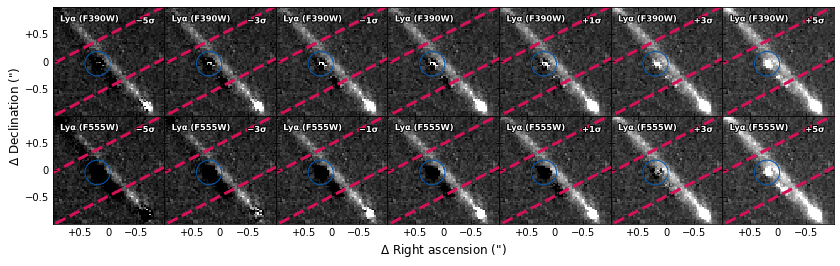

In [8]:
plot()